In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
box = pd.read_csv('train_solution_bounding_boxes (1).csv')
box

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


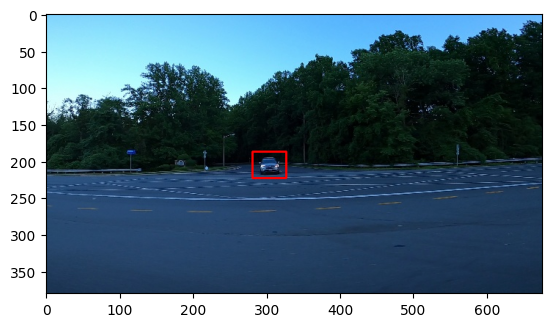

In [ ]:
sample = cv2.imread('/content/drive/MyDrive/training_images/vid_4_1000.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
point = box.iloc[0]
pt1 = (int(point['xmin']), int(point['ymax']))
pt2 = (int(point['xmax']), int(point['ymin']))
cv2.rectangle(sample, pt1, pt2, color=(255,0,0), thickness=2)
plt.imshow(sample)

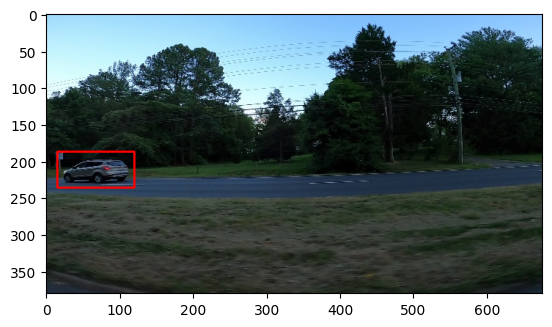

In [ ]:
sample = cv2.imread('/content/drive/MyDrive/training_images/vid_4_10000.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
point = box.iloc[1]
pt1 = (int(point['xmin']), int(point['ymax']))
pt2 = (int(point['xmax']), int(point['ymin']))
cv2.rectangle(sample, pt1, pt2, color=(255,0,0), thickness=2)
plt.imshow(sample)

In [ ]:
# Yolo 로드
net = cv2.dnn.readNet("/content/drive/MyDrive/training_images/yolov3.weights", "/content/drive/MyDrive/training_images/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/training_images/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
out_layer_indices = net.getUnconnectedOutLayers()

# OpenCV의 버전이나 반환 형식에 따라, out_layer_indices가 정수 배열인지 또는 배열의 배열인지 확인
# out_layer_indices가 배열의 배열 (예: [[1], [2], [3]]) 형태로 반환되면, 첫 번째 원소를 선택
if len(out_layer_indices) > 0 and isinstance(out_layer_indices[0], (list, np.ndarray)):
    output_layers = [layer_names[i[0] - 1] for i in out_layer_indices]
else:
    # out_layer_indices가 정수 배열 (예: [1, 2, 3]) 형태로 반환되면, 직접 사용
    output_layers = [layer_names[i - 1] for i in out_layer_indices]


In [ ]:
# 이미지 가져오기
img = cv2.imread('/content/drive/MyDrive/training_images/vid_4_10000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, channels = img.shape

In [ ]:
blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), swapRB=True, crop=False)
net.setInput(blob)

# outs는 출력으로 탐지된 개체에 대한 모든 정보와 위치를 제공한다.
outs = net.forward(output_layers)

In [ ]:
# 정보를 화면에 표시
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

22 197 92 32


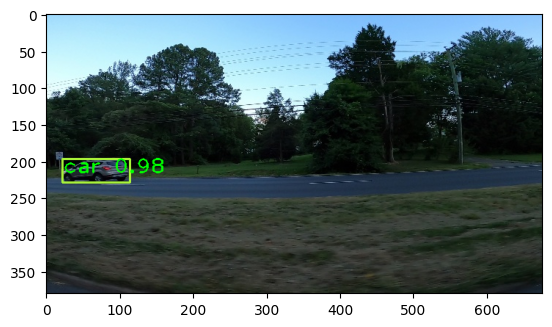

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

for i in indexes.flatten():
    x, y, w, h = boxes[i]
    print(x, y, w, h)
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i], 2))
    color = colors[i]
    cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
    cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

plt.imshow(img)

In [ ]:
def predict_yolo(img_path):
  # 이미지 가져오기
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  height, width, channels = img.shape

  blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), swapRB=True, crop=False)
  net.setInput(blob)
  outs = net.forward(output_layers)

  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.5:
              # Object detected
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)
              # 좌표
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)
              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

  font = cv2.FONT_HERSHEY_PLAIN
  colors = np.random.uniform(0, 255, size=(len(boxes), 3))
  if len(indexes) > 0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i], 2))
        color = colors[i]
        cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
        cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

    plt.imshow(img)

  else:
    print('탐지된 물체가 없습니다.')

578 182 88 30


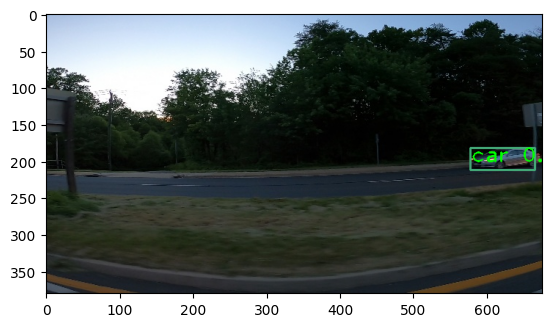

In [ ]:
import glob
import random

paths = glob.glob('/content/drive/MyDrive/testing_images/*.jpg')

img_path = random.choice(paths)

predict_yolo(img_path)

389 186 163 53
584 177 90 31
31 186 107 40


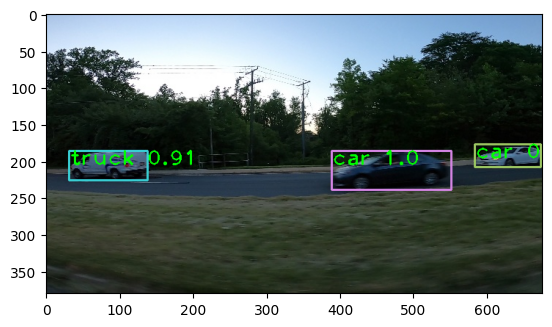

In [ ]:
img_path = random.choice(paths)

predict_yolo(img_path)

321 529 54 71
436 615 445 390
349 501 21 23
132 887 415 113
90 494 70 73
446 495 16 14


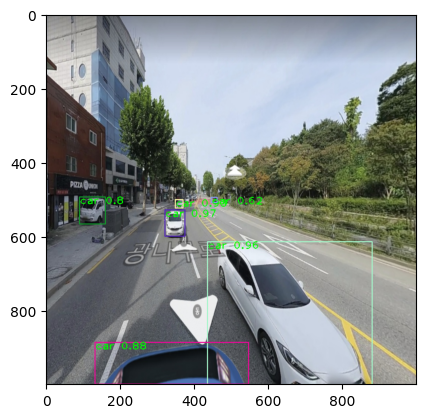

In [ ]:
import glob
import random
paths = glob.glob('/content/KakaoTalk_20240301_143030424.png')
img_path = random.choice(paths)
# 이미지
image = cv2.imread(img_path)
# 이미지 676x380 리사이징
resized_image = cv2.resize(image, (1000, 1000))

# 경로
resized_img_path = '/content/resized_image.jpg'

# 저장
cv2.imwrite(resized_img_path, resized_image)

# 예측 정확
predict_yolo(resized_img_path)

389 186 163 53
584 177 90 31
31 186 107 40


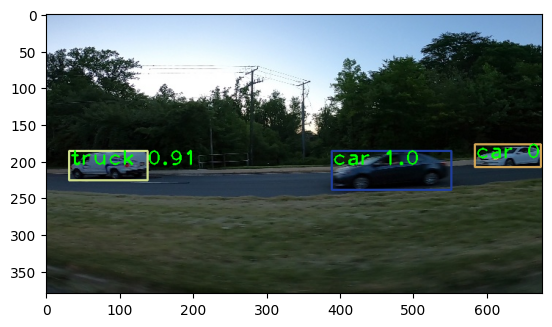

In [ ]:
img_path = random.choice(paths)

predict_yolo(img_path)

In [ ]:
# 정보를 화면에 표시
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2.imshow("/content/train_solution_bounding_boxes (1).csv", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow
